# Lab | Cleaning numerical data

Context:

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

Instructions
1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
3. First look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
5. Change effective to date column to datetime format.
6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df
7. Plot a correlation matrix, comment what you see.
8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)
9. Comment what you can see in the plots.
10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
11. Did you find outliers? Comment what you will do with them.
12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First look at its main features (head, shape, info).

In [3]:
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [5]:
# no NaN-Values
round(customer_df.isna().sum()/len(customer_df),4)*100

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
# standardize headers
customer_df.columns = [e.lower().replace(' ', '_') for e in customer_df.columns]
customer_df = customer_df.rename(columns={'employmentstatus': 'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change effective to date column to datetime format.

In [7]:
### date/time format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
customer_df['customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

In [9]:
customer_df['customer'].nunique()
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
def diff_continuous_discrete(df):   
    df_num = df.select_dtypes(np.number)
    
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for column in df_num:
        if ((df_num[column].nunique()/len(df_num)*100) > 20):
            continuous_df = pd.concat([continuous_df, df_num[column]], axis = 1)
        else:
            discrete_df = pd.concat([discrete_df, df_num[column]], axis = 1)
    
    display(discrete_df.head())
    display(continuous_df.head())
    return discrete_df, continuous_df

discrete_df, continuous_df = diff_continuous_discrete(customer_df)

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


### 7. Plot a correlation matrix, comment what you see.

In [11]:
corr_matrix = customer_df.select_dtypes(np.number).corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


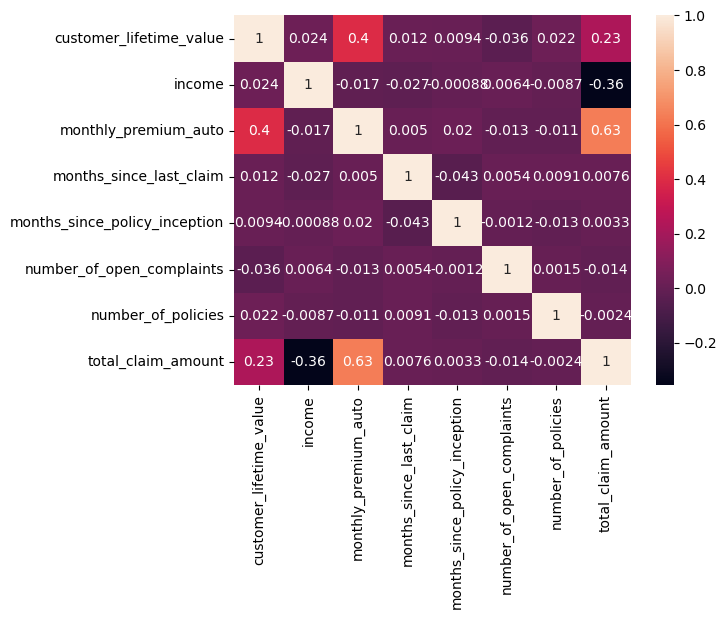

In [12]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

Based on the Correlations Index:

- 0.9 and 1.0 very highly correlated
- 0.7 and 0.9 highly correlated
- 0.5 and 0.7 moderately correlated
- 0.3 and 0.5 low correlation
- less than 0.3 little if any (linear) correlation. 

We can see that:
- total_claim_amount <> monthly_premium_auto        are moderately correlated (0.63)
- monthly_premium_auto <> customer_lifetime_value   are lowly correlated (0.4)
- total_claim_amount <> customer_lifetime_value     are lowly correlated (0.23) 
- total_claim_amount <> income                      are lowly correlated (-0.36)


### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [13]:
#def plot_discrete(discrete_df):
#    for column in discrete_df.columns:
#        plt.figure()
#        plt.title(column)
#        plt.hist(discrete_df[column])

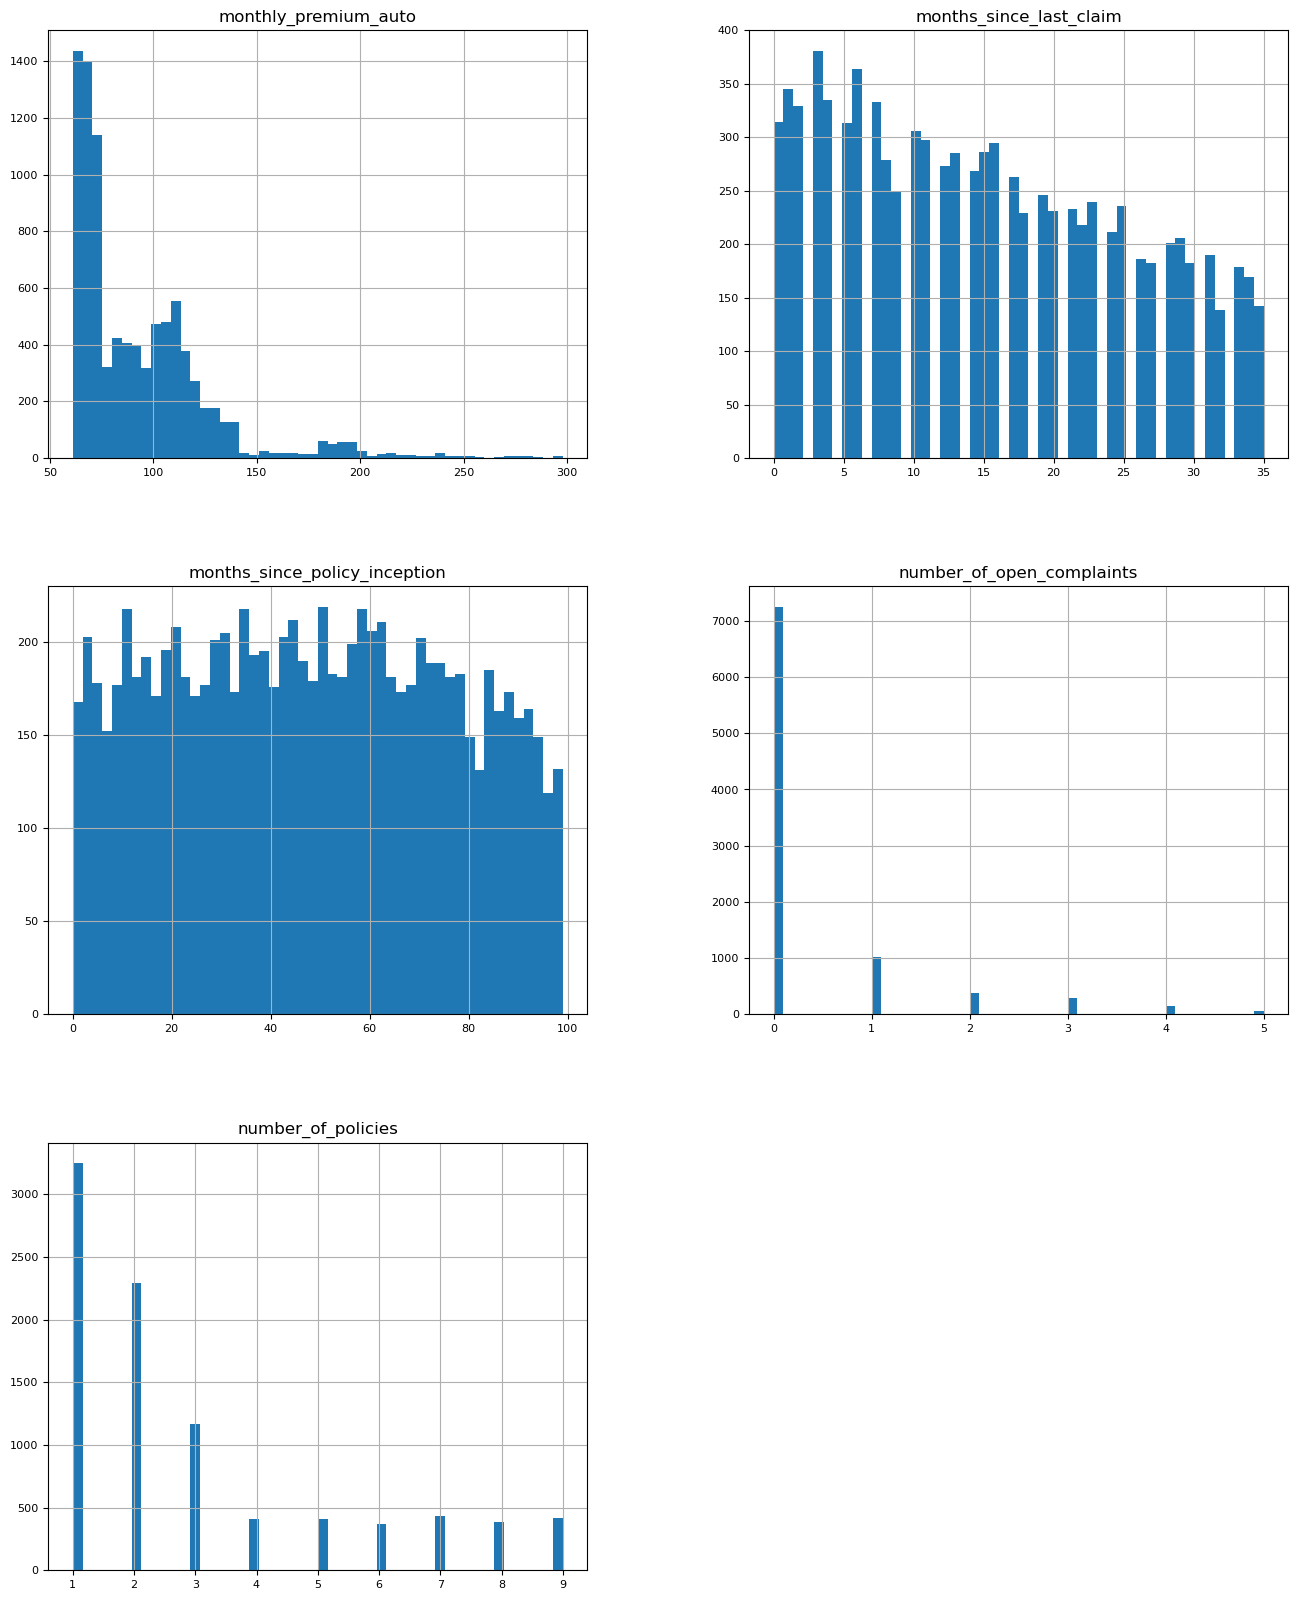

In [14]:
def plot_discrete(discrete_df):
    discrete_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    
plot_discrete(discrete_df)

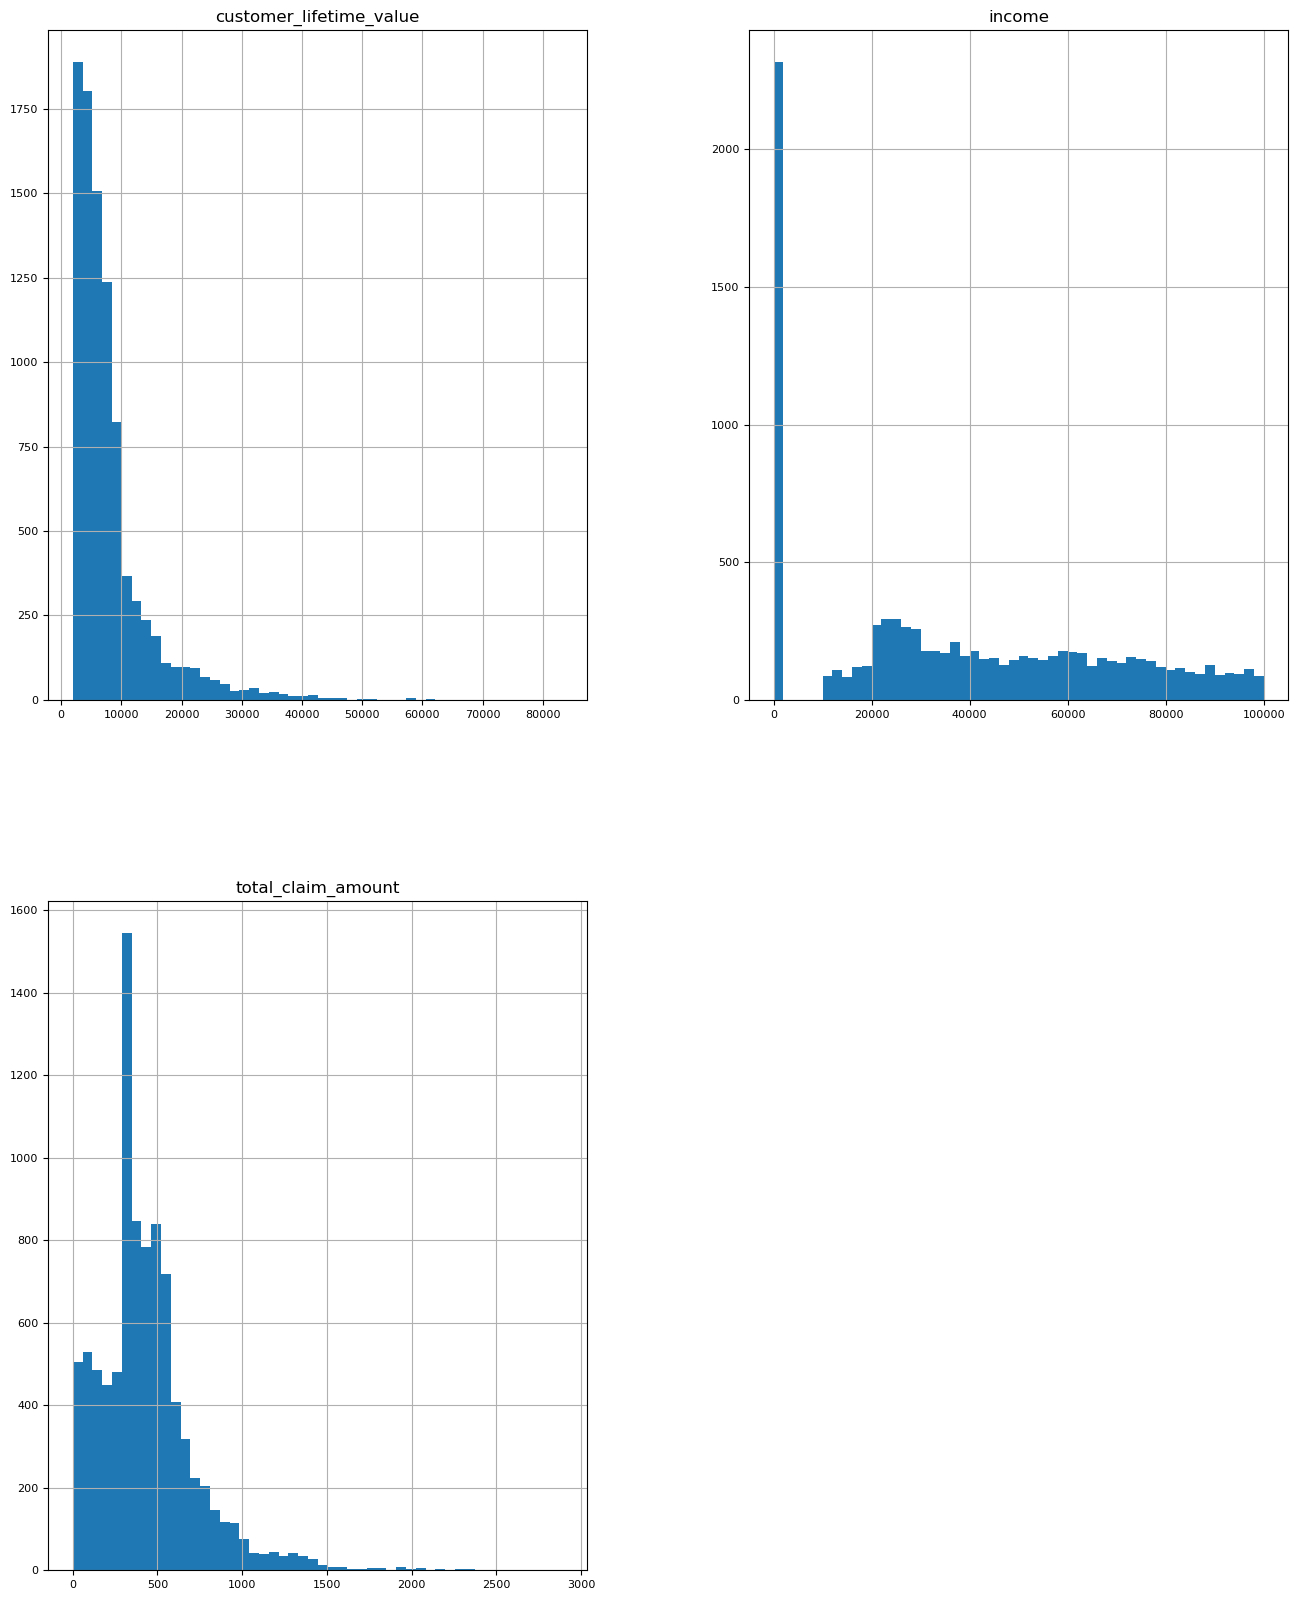

In [15]:
def plot_continuous(continuous_df):
    continuous_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plot_continuous(continuous_df)

### 9. Comment what you can see in the plots.

Discrete Variables:

- monthly_premium_auto: right-skewed distribution, range = [50 - 300], a lot of outliers from 200+
- months_since_last_claim: lightly right-skewed distribution, range = [0 - 35], no relevant outliers visible
- months_since_policy_inception: uniform distribution, range = [0 - 100], no relevant outliers visible
- number_of_open_complaints: strong right-skewed distribution (high amount of values in for the 0), range = [0 - 5], outliers (2-5 ?)
- number_of_policies: right-skewed distribution (high amount of values in for the 1), range = [1 - 9], no relevant outliers visible

Continuous Variables:

- customer_lifetime_value: strongly right-skewed distribution, range = [0 - 600'000], outliers at around 600'000.
- income: a very high amount of 0 income! 
- total_claim_amount: non-symmetric bimodal distribution, range = [0 - 2500], outliers from 1500+

### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

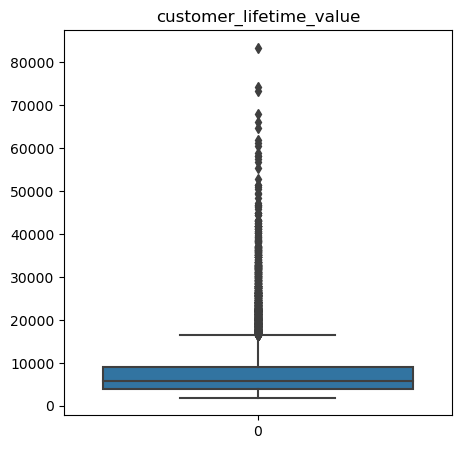

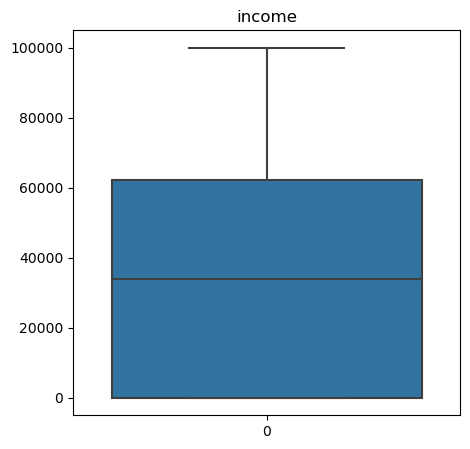

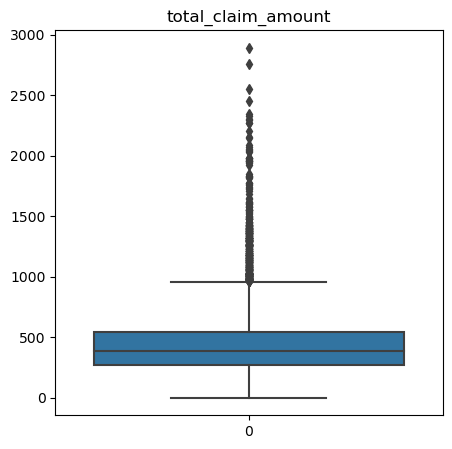

In [16]:
def plot_continuous_boxplot(continuous_df):
    for column in continuous_df.columns:
        plt.figure(figsize=(5, 5))
        plt.title(column)
        sns.boxplot(data=continuous_df[column])
plot_continuous_boxplot(continuous_df)

### 11. Did you find outliers? Comment what you will do with them.

Continuous Variables:
- customer_lifetime_value: there are some outliers, from around 60'000 upwards. If we were to remove the rows were the value is above 60'000, we would delete 9 rows, which is ok.
- income: no outliers
- total_claim_amount: some outliers, from around 2'000 upwards. If we were to remove the rows were the value is above 2'000, we would delete 19 rows, which is ok.

--> this means in total we would delete 28 rows from total 9134 rows.

In [17]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(customer_df['customer_lifetime_value'],75) - np.nanpercentile(customer_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(customer_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = customer_df[customer_df['customer_lifetime_value'] > 60000] # We do a visual inspection and see that all the numbers over 60'000 should be removed!
len(extraordinary_points)  # This checks the number of points that will be removed

# we already checked the NaN - Values before!
customer_df = customer_df[customer_df['customer_lifetime_value'] <= 60000]

16414.039911750002


In [18]:
# We drop the rows that are above 2000
customer_df = customer_df[customer_df['customer_lifetime_value'] <= 60000]
# however, using <= also removes the rows for which TIMELAG is NaN, se we would need to fillna first!

In [19]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(customer_df['total_claim_amount'],75) - np.nanpercentile(customer_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(customer_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = customer_df[customer_df['total_claim_amount'] > 2000] # We do a visual inspection and see that all the numbers over 2000 should be removed!
len(extraordinary_points)  # This checks the number of points that will be removed

# we already checked the NaN - Values before!
customer_df = customer_df[customer_df['total_claim_amount'] <= 2000]


959.7071520000002


In [20]:
# We drop the rows that are above 2000
customer_df = customer_df[customer_df['total_claim_amount'] <= 2000]
# however, using <= also removes the rows for which TIMELAG is NaN, se we would need to fillna first!

In [21]:
customer_df.shape

(9107, 24)

### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

Checked before! There are no NaN values.

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions
1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data? Decide how to clean it.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

### 2. Find all of the categorical data. Save it in a categorical_df variable.

In [22]:
categorical_df = customer_df.select_dtypes(np.object)
categorical_df.head()

/var/folders/v7/ctgngqdj6_j2cgx35nnddp8r0000gn/T/ipykernel_6881/3832337599.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 3. Check for NaN values.

In [23]:
# we already checked for NaN values before but here the code again, to confirm there are no NaNs.
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

### 4. Check all unique values of columns.

In [24]:
for column in categorical_df:
  print(column, categorical_df[column].unique())

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employment_status ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


### 5. Check dtypes. Do they all make sense as categorical data?

### 6. Does any column contain alpha and numeric data? Decide how to clean it.

### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [25]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [26]:
for column in categorical_df:
    display(categorical_df[column].value_counts(dropna=False))


BU79786    1
DG23204    1
AQ30231    1
MU97512    1
CO75086    1
          ..
SD67101    1
UO40192    1
AM52614    1
RT63209    1
Y167826    1
Name: customer, Length: 9107, dtype: int64

California    3139
Oregon        2595
Arizona       1699
Nevada         879
Washington     795
Name: state, dtype: int64

No     7799
Yes    1308
Name: response, dtype: int64

Basic       5560
Extended    2730
Premium      817
Name: coverage, dtype: int64

Bachelor                2739
College                 2672
High School or Below    2613
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5689
Unemployed       2300
Medical Leave     431
Disabled          405
Retired           282
Name: employment_status, dtype: int64

F    4649
M    4458
Name: gender, dtype: int64

Suburban    5753
Rural       1772
Urban       1582
Name: location_code, dtype: int64

Married     5287
Single      2451
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6772
Corporate Auto    1958
Special Auto       377
Name: policy_type, dtype: int64

Personal L3     3417
Personal L2     2118
Personal L1     1237
Corporate L3    1010
Corporate L2     593
Corporate L1     355
Special L2       164
Special L3       147
Special L1        66
Name: policy, dtype: int64

Offer1    3738
Offer2    2919
Offer3    1428
Offer4    1022
Name: renew_offer_type, dtype: int64

Agent          3469
Branch         2557
Call Center    1761
Web            1320
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1795
Sports Car        483
Luxury SUV        173
Luxury Car        149
Name: vehicle_class, dtype: int64

Medsize    6406
Small      1759
Large       942
Name: vehicle_size, dtype: int64

- response: (Yes, No) --> change to boolean? 
- customer: dropping the column, because it is individual and doesn't help us.
- otherwise I wouldn't change anything at the moment.


In [27]:
categorical_df = categorical_df.drop('customer', axis=1)

In [28]:
categorical_df['response'] = (categorical_df.response == 'Yes')*1
categorical_df['response'] = categorical_df['response'].astype('bool')


In [29]:
customer_df['response'] = categorical_df['response']

In [30]:
categorical_df = categorical_df.drop('response', axis = 1)

In [31]:
categorical_df.dtypes

state                object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [32]:
#check if the type boolean has been updated for response.
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                   bool
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [33]:
categorical_df['policy_type'].value_counts()
#categorical_df['policy_type'] = np.where(categorical_df.policy_type.isin('Corporate*'),'other', data.STATE)


Personal Auto     6772
Corporate Auto    1958
Special Auto       377
Name: policy_type, dtype: int64

In [34]:
categorical_df['policy'].value_counts()

Personal L3     3417
Personal L2     2118
Personal L1     1237
Corporate L3    1010
Corporate L2     593
Corporate L1     355
Special L2       164
Special L3       147
Special L1        66
Name: policy, dtype: int64

In [35]:
# we will keep only the "L3, L2 or L1"-values separately from the Personal, Corporate or Special values since the information is redundant.
categorical_df.policy = categorical_df.policy.str.replace("\w* ",'') 

/var/folders/v7/ctgngqdj6_j2cgx35nnddp8r0000gn/T/ipykernel_6881/2689980691.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  categorical_df.policy = categorical_df.policy.str.replace("\w* ",'')


### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [36]:
for column in categorical_df:
    display(categorical_df[column].value_counts(dropna=False))

California    3139
Oregon        2595
Arizona       1699
Nevada         879
Washington     795
Name: state, dtype: int64

Basic       5560
Extended    2730
Premium      817
Name: coverage, dtype: int64

Bachelor                2739
College                 2672
High School or Below    2613
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5689
Unemployed       2300
Medical Leave     431
Disabled          405
Retired           282
Name: employment_status, dtype: int64

F    4649
M    4458
Name: gender, dtype: int64

Suburban    5753
Rural       1772
Urban       1582
Name: location_code, dtype: int64

Married     5287
Single      2451
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6772
Corporate Auto    1958
Special Auto       377
Name: policy_type, dtype: int64

L3    4574
L2    2875
L1    1658
Name: policy, dtype: int64

Offer1    3738
Offer2    2919
Offer3    1428
Offer4    1022
Name: renew_offer_type, dtype: int64

Agent          3469
Branch         2557
Call Center    1761
Web            1320
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1795
Sports Car        483
Luxury SUV        173
Luxury Car        149
Name: vehicle_class, dtype: int64

Medsize    6406
Small      1759
Large       942
Name: vehicle_size, dtype: int64

I wouldn't make any additional changes right now.

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
1. Open the categoricals variable we created before.  
`categoricals = data.select_dtypes(np.object)`  
`categoricals.head()`  
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

### 1. Open the categoricals variable we created before.  

In [37]:
categorical_df.head()

,state,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?

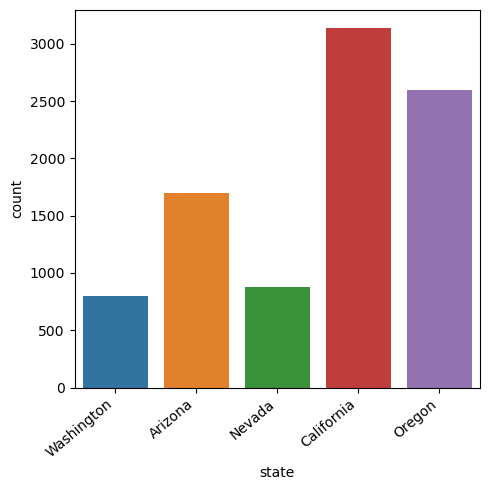

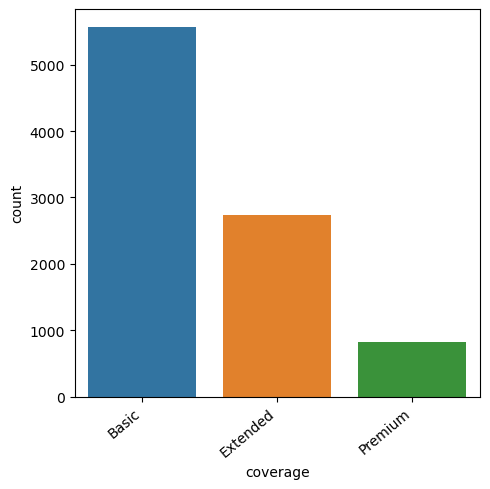

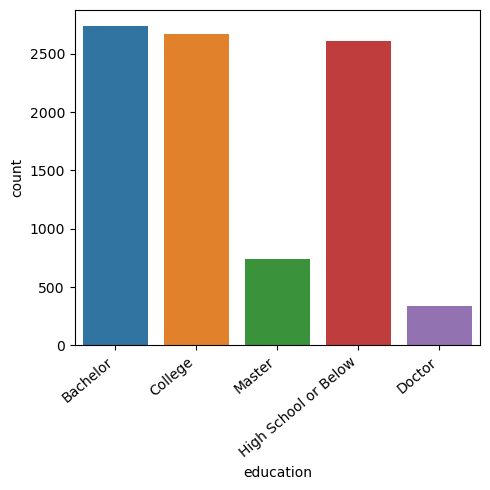

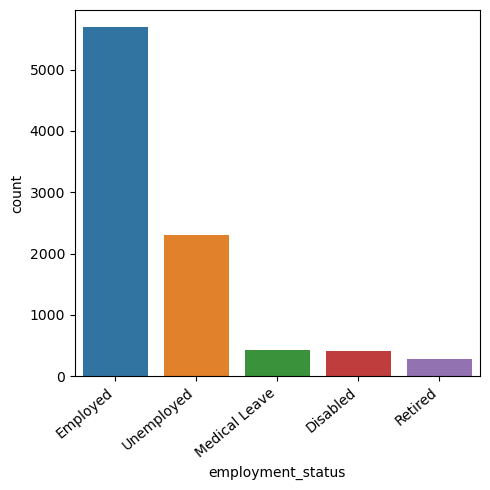

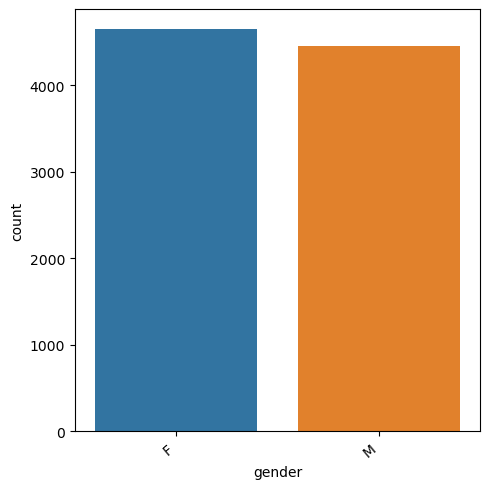

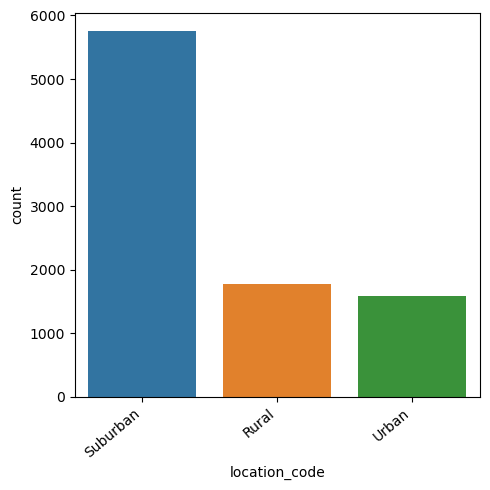

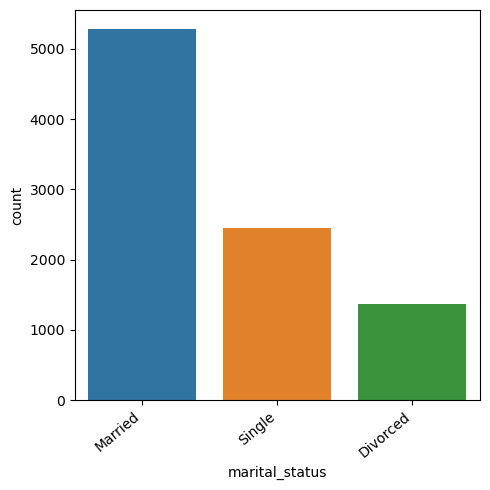

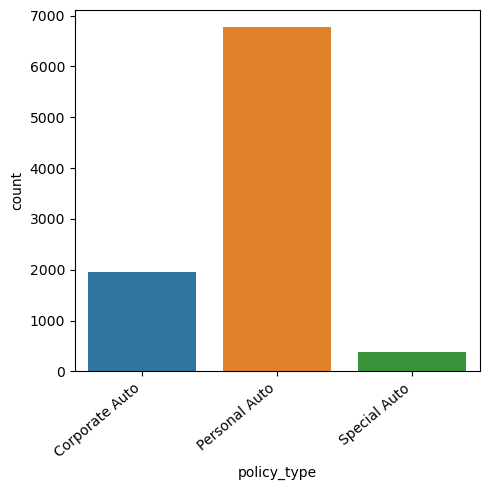

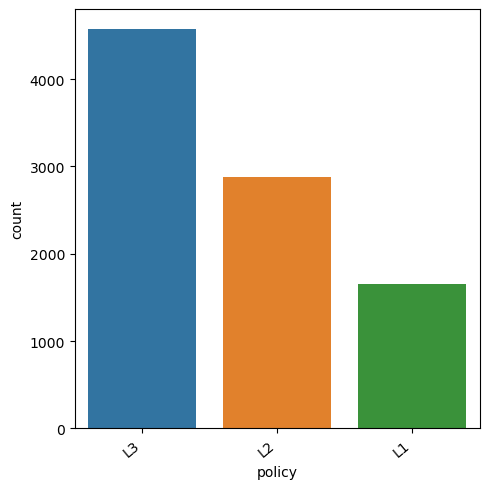

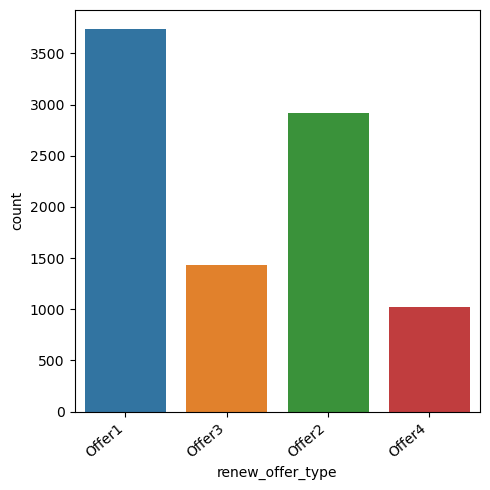

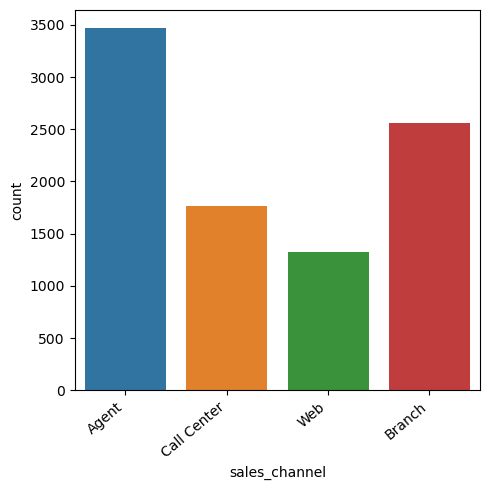

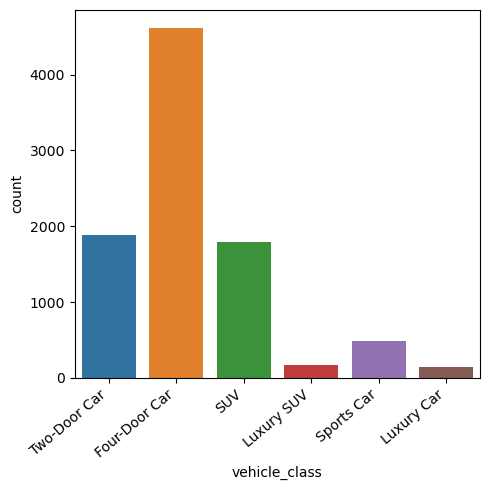

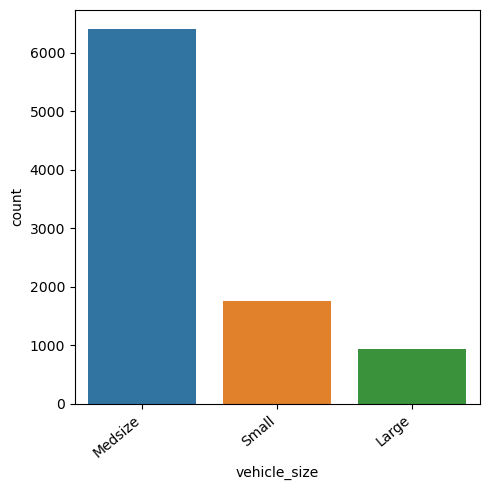

In [38]:
# Have a look here: https://seaborn.pydata.org/tutorial/categorical.html
# maybe here as well to get a "percentage" https://seaborn.pydata.org/generated/seaborn.histplot.html

def plot_categorical_countplot(categorical_df):
    for column in categorical_df.columns:
        plt.figure(figsize=(5, 5))
        
        ax = sns.countplot(x=column, data=categorical_df)
        #ax = sns.histplot(data=categorical_df, x=column, stat="percent")#, multiple="dodge", shrink=.8)

        #rotating the ticklabels on the x-asis:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()
        plt.show()

plot_categorical_countplot(categorical_df)

None of the categories have normal distribution.  
In general the number of categories is manageable with 3-5 categories. vehicle_class has more categories, we can adapt this, by adding to the "Luxury Car" the categories "Luxury SUV" and "Sports Car".

In [39]:
categorical_df['vehicle_class']= np.where(categorical_df['vehicle_class'].isin(['Sports Car', 'Luxury SUV']), 'Luxury Car', categorical_df['vehicle_class'])

In [40]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1795
Luxury Car        805
Name: vehicle_class, dtype: int64

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [41]:
categorical_df.value_counts()

state       coverage  education             employment_status  gender  location_code  marital_status  policy_type    policy  renew_offer_type  sales_channel  vehicle_class  vehicle_size
Arizona     Basic     Master                Employed           M       Rural          Divorced        Personal Auto  L3      Offer2            Branch         Four-Door Car  Small           4
Oregon      Basic     Bachelor              Unemployed         F       Suburban       Single          Personal Auto  L3      Offer1            Agent          Four-Door Car  Medsize         4
California  Premium   Master                Employed           M       Rural          Married         Personal Auto  L2      Offer1            Agent          Two-Door Car   Medsize         4
            Basic     High School or Below  Employed           M       Urban          Married         Personal Auto  L2      Offer2            Agent          Four-Door Car  Large           3
                      Bachelor              Medica

I cannot see any redundancy. We already dropped the column policy_type in the previous lab.

### 4. Plot time variable. Can you extract something from it?

In [42]:
# datetime variable plot

In [43]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [44]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9107, dtype: datetime64[ns]

In [45]:
from datetime import datetime

import matplotlib.pyplot
import matplotlib.dates

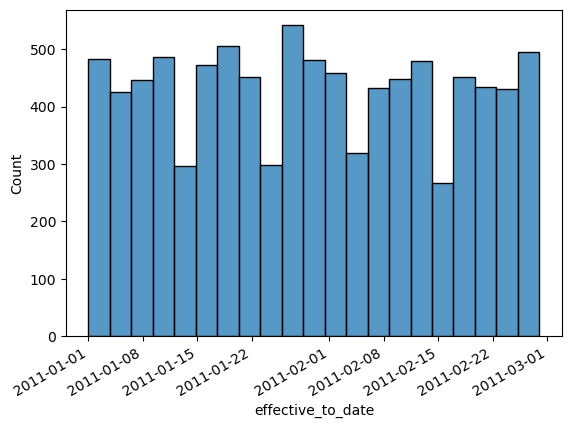

In [46]:
sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['effective_to_date'])
plt.gcf().autofmt_xdate()

In [47]:
customer_df['etd_day'] = customer_df['effective_to_date'].dt.day
customer_df['etd_week'] = customer_df['effective_to_date'].dt.isocalendar().week
customer_df['etd_month'] = customer_df['effective_to_date'].dt.month
customer_df['etd_year'] = customer_df['effective_to_date'].dt.year
customer_df.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,etd_day,etd_week,etd_month,etd_year
0,BU79786,Washington,2763.519279,False,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2,2011
1,QZ44356,Arizona,6979.535903,False,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,5,1,2011
2,AI49188,Nevada,12887.431650,False,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2,2011
3,WW63253,California,7645.861827,False,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1,2011
4,HB64268,Washington,2813.692575,False,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2,2011


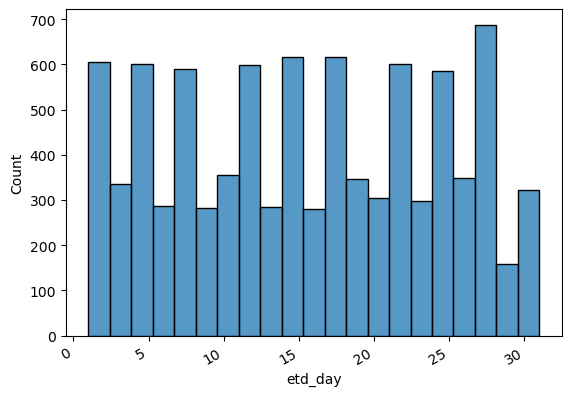

In [48]:
sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['etd_day'])
plt.gcf().autofmt_xdate()

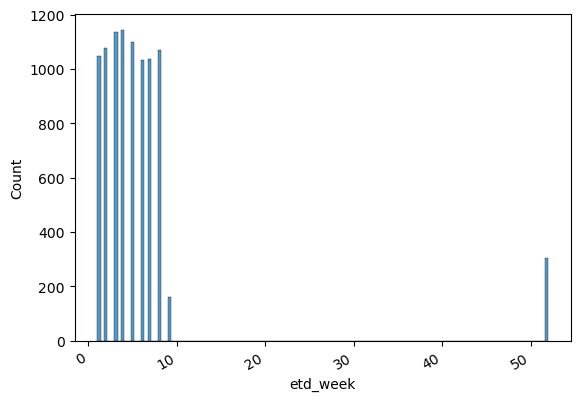

In [49]:
sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['etd_week'])
plt.gcf().autofmt_xdate()

(1.0, 12.0)

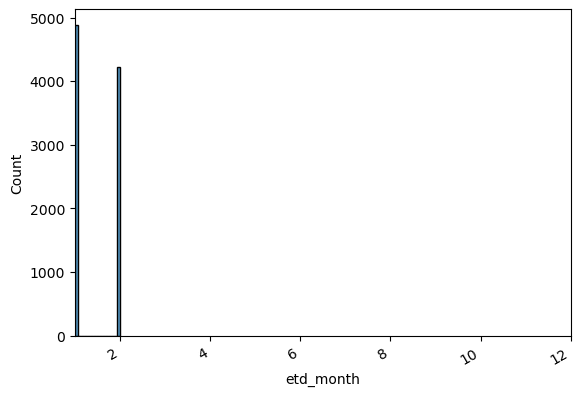

In [50]:
ax = sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['etd_month'])
plt.gcf().autofmt_xdate()
ax.set_xlim(1,12)

(2008.0, 2015.0)

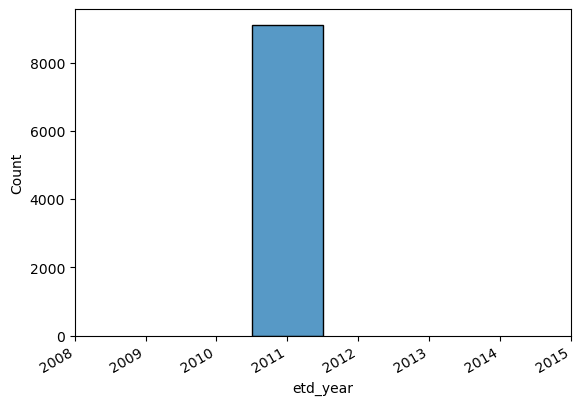

In [51]:
ax = sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['etd_year'])
plt.gcf().autofmt_xdate()
ax.set_xlim(2008,2015)

We have data only for the year 2011 and out of this for the months January and February. The day/week distribution seems to be quite balanced.

# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previously created and used in labs.

Instructions
1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
2. We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
3. Create a copy of the dataframe for the data wrangling.
4. Normalize the continuous variables. You can use any one method you want.
5. Encode the categorical variables (See the hint below for encoding categorical data!!!)
6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding. 

Hint for Categorical Variables
You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

| Encoder Type | Column |
| --- | --- |
| One hot | state | 
| Ordinal | coverage | 
| Ordinal | employmentstatus | 
| Ordinal | location code | 
| One hot | marital status | 
| One hot | policy type | 
| One hot | policy | 
| One hot | renew offercustomer_df | 
| One hot | sales channel | 
| One hot | vehicle class | 
| Ordinal | vehicle size | 

	
Dummy code
`data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})`

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.

8. Try a simple linear regression with all the data to see whether we are getting good results.
9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
10. Use the function to check LinearRegressor and KNeighborsRegressor.
11. You can check also the MLPRegressor for this task!
12. Check and discuss the results.

### 2. We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

We already dropped the outliers in the Lab | cleaning numerical data.

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [52]:
#for regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

These Lab do not entirely work together... Since I did not create a numerical_df in the first lab, I first need to extract the numerical data from customer_df and then concatenate numerical_df and categorical_df in order to keep the changes made in the second and third lab on the categorical_df.

In [53]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.shape
numerical_df = numerical_df.drop('etd_year', axis=1)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,etd_day,etd_week,etd_month
0,2763.519279,56274,69,32,5,0,1,384.811147,24,8,2
1,6979.535903,0,94,13,42,0,8,1131.464935,31,5,1
2,12887.431650,48767,108,18,38,0,2,566.472247,19,7,2
3,7645.861827,0,106,18,65,0,7,529.881344,20,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,3,5,2


In [54]:
categorical_df.shape

(9107, 13)

In [55]:
data = pd.concat([categorical_df, numerical_df],axis=1)
data.shape

(9107, 24)

### 3. Create a copy of the dataframe for the data wrangling.

why ?

In [56]:
data_copy = data.copy()
data_copy.shape

(9107, 24)

Now, we will separate the data from the copy (?!):

In [57]:
X = data_copy.drop(['total_claim_amount'],axis=1)
y = data_copy['total_claim_amount']

In [58]:
display(X.shape)
display(y.shape)

(9107, 23)

(9107,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [60]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(5464, 23)

(3643, 23)

(5464,)

(3643,)

### 4. Normalize the continuous variables. You can use any one method you want.


In [61]:
discrete_df, continuous_df = diff_continuous_discrete(data_copy)

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,etd_day,etd_week,etd_month
0,69,32,5,0,1,24,8,2
1,94,13,42,0,8,31,5,1
2,108,18,38,0,2,19,7,2
3,106,18,65,0,7,20,3,1
4,73,12,44,0,1,3,5,2


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


In [62]:
# transformations on numericals:
#     fit ONLY on numericals_train
#     transform BOTH numericals_train and numericals_test

In [63]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,etd_day,etd_week,etd_month
2143,3237.996209,60244,83,3,72,3,1,16,2,1
8956,8382.478392,25998,71,16,38,0,2,27,4,1
7612,32069.875260,24851,103,8,99,0,2,15,2,1
2408,13610.107460,50144,114,0,35,0,2,6,5,2
2764,16473.169050,22828,106,11,54,0,2,24,8,2


In [64]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [65]:
pd.DataFrame(numericals_train_standardized).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.712208,0.740292,-0.291362,-1.202563,0.856657,2.815107,-0.816802,0.070764,-0.466581,-0.924850
1,0.068740,-0.392177,-0.648701,0.098349,-0.367414,-0.424519,-0.401136,1.346856,-0.239271,-0.924850
2,3.664558,-0.430106,0.304202,-0.702212,1.828714,-0.424519,-0.401136,-0.045244,-0.466581,-0.924850
3,0.862310,0.406299,0.631763,-1.502774,-0.475420,-0.424519,-0.401136,-1.089319,-0.125616,1.081256
4,1.296931,-0.497004,0.393537,-0.402002,0.208620,-0.424519,-0.401136,0.998831,0.215350,1.081256


### 5. Encode the categorical variables (See the hint below for encoding categorical data!!!)


In [66]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.shape

(5464, 13)

Ordinal Encoding of the variables "coverage", "employment_status" and "location_code":

In [67]:
categoricals_train_ordinal = pd.DataFrame()
categoricals_test_ordinal = pd.DataFrame()

In [68]:
categoricals_train_ordinal['coverage'] = categoricals_train["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categoricals_train_ordinal['employment_status'] = categoricals_train["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
categoricals_train_ordinal['location_code'] = categoricals_train["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
categoricals_train_ordinal.head()

,coverage,employment_status,location_code
2143,1,0,2
8956,0,0,0
7612,0,0,0
2408,0,0,0
2764,0,4,0


In [69]:
categoricals_test_ordinal['coverage'] = categoricals_test["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categoricals_test_ordinal['employment_status'] = categoricals_test["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
categoricals_test_ordinal['location_code'] = categoricals_test["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
categoricals_test_ordinal.head()

,coverage,employment_status,location_code
350,2,3,1
1028,0,2,0
7445,0,2,0
1011,2,0,1
4155,1,1,0


In [70]:
categoricals_train_onehot= categoricals_train.drop(['coverage','employment_status','location_code' ], axis=1)
categoricals_train_onehot.shape # we lost 3 columns - ok!
categoricals_test_onehot=categoricals_test.drop(['coverage','employment_status','location_code' ], axis=1)
categoricals_test_onehot.shape # we lost 3 columns - ok!

(3643, 10)

In [71]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train_onehot)
categoricals_train_encoded = encoder.transform(categoricals_train_onehot).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test_onehot).toarray()

In [72]:
encoder.categories_

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['L1', 'L2', 'L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury Car', 'SUV', 'Two-Door Car'], dtype=object),
 array(['Large', 'Medsize', 'Small'], dtype=object)]

### 6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.


This was already done in the Lab | Feature Extraction. We dropped the columns year as well.

### 7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding. 

In [73]:
X_train_processed = np.concatenate((categoricals_train_ordinal, categoricals_train_encoded, numericals_train_standardized),axis=1)
X_test_processed = np.concatenate((categoricals_test_ordinal, categoricals_test_encoded, numericals_test_standardized),axis=1)

In [74]:
#Check that every column is numerical!
pd.DataFrame(X_train_processed).select_dtypes(np.object)

/var/folders/v7/ctgngqdj6_j2cgx35nnddp8r0000gn/T/ipykernel_6881/1849843642.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pd.DataFrame(X_train_processed).select_dtypes(np.object)


""
0
1
2
3
4
...
5459
5460
5461
5462


### 8. Try a simple linear regression with all the data to see whether we are getting good results.


In [75]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [76]:
# We caculate the linear regression based on the "train"-data
LR = linear_model.LinearRegression()
LR.fit(X_train_processed,y_train)

LinearRegression()

In [77]:
y_predicted_train = LR.predict(X_train_processed)
R2_train = r2_score(y_train, y_predicted_train)
print("R2-train-score is ", R2_train)

R2-train-score is  0.6271885041969216


In [78]:
y_predicted_test = LR.predict(X_test_processed)
R2_test = r2_score(y_test, y_predicted_test)
print("R2-test-score is ", R2_test)

R2-test-score is  0.6057347719990305


### 9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [79]:
def models_train(model, X_train_processed, y_train, X_test_processed, y_test):
    #to use the LR-Model import:
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_absolute_error
    #to use the KNN-Model import:
    from sklearn.neighbors import KNeighborsRegressor
    #to use the MLP-Model import:
    from sklearn.neural_network import MLPRegressor
    from sklearn.neural_network import MLPClassifier

    train = {"LR":[],"KNN":[],"MLPR":[]}
    scores = {"LR":[],"KNN":[],"MLPR":[]}

    for m in model:
        if (m == 'LR'):
            model = linear_model.LinearRegression()
            model.fit(X_train_processed,y_train)
            y_predicted_train = LR.predict(X_train_processed)
            train[m].append(r2_score(y_train, y_predicted_train))
            scores[m].append(r2_score(y_test, y_predicted_test))
        elif (m == 'KNN'):
            for k in range(2,25):
                model = KNeighborsRegressor(n_neighbors=k)
                model.fit(X_train_processed, y_train)
                scores[m].append(model.score(X_test_processed, y_test))
                train[m].append(model.score(X_train_processed, y_train))
        elif (m == 'MLPR'):
            model = MLPRegressor(solver='lbfgs')
            model.fit(X_train_processed, y_train)
            train[m].append(r2_score(y_train, y_predicted_train))
            scores[m].append(r2_score(y_test, y_predicted_test))        
        else:
            print("The model selected is not supported yet")
    
    print("The model with the best score is,", max(scores, key=scores.get), "with a score of:", scores[max(scores, key=scores.get)])
    return scores, train



We do not have all the elements of the Regression Models in this function. The MLPRegressor doesn't converge, maybe by changing some feature this would be working.

### 10. Use the function to check LinearRegressor and KNeighborsRegressor.

In [80]:
model = ['LR' ,'KNN']

scores, train = models_train(model, X_train_processed,y_train,X_test_processed,y_test)

The model with the best score is, LR with a score of: [0.6057347719990305]


In [81]:
scores

{'LR': [0.6057347719990305],
 'KNN': [0.5130452531438412,
  0.5519078717824802,
  0.5753877216509469,
  0.5838110282597222,
  0.591251914332391,
  0.5955906267657165,
  0.5984105889068357,
  0.5969532956148094,
  0.5967944392055246,
  0.5976606405574455,
  0.5968025385898154,
  0.5982502168968244,
  0.5978560370470883,
  0.5965610556153825,
  0.595330107561139,
  0.5940577127042025,
  0.5924457117924944,
  0.5914608974603899,
  0.5913449177730378,
  0.5903128291515873,
  0.5888437326225593,
  0.5889563663704384,
  0.5878667615681017],
 'MLPR': []}

### 11. You can check also the MLPRegressor for this task!

In [82]:
model = ['LR' ,'KNN', 'MLPR']

scores, train = models_train(model, X_train_processed,y_train,X_test_processed,y_test)

The model with the best score is, LR with a score of: [0.6057347719990305]


/Users/josephinebonvin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### 12. Check and discuss the results.

The first LR-Model gives us the best result with a score of 0.6057. The KNN-Model doesn't give us a better result with a k-value in the range [2, 25].
The MLPRegressor fails to converge.

# Lab | Random variable distributions

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

Instructions
1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### 1. Get the numerical variables from our dataset.

In [83]:
numerical_df_lab_5 = data_copy.select_dtypes(np.number)

### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

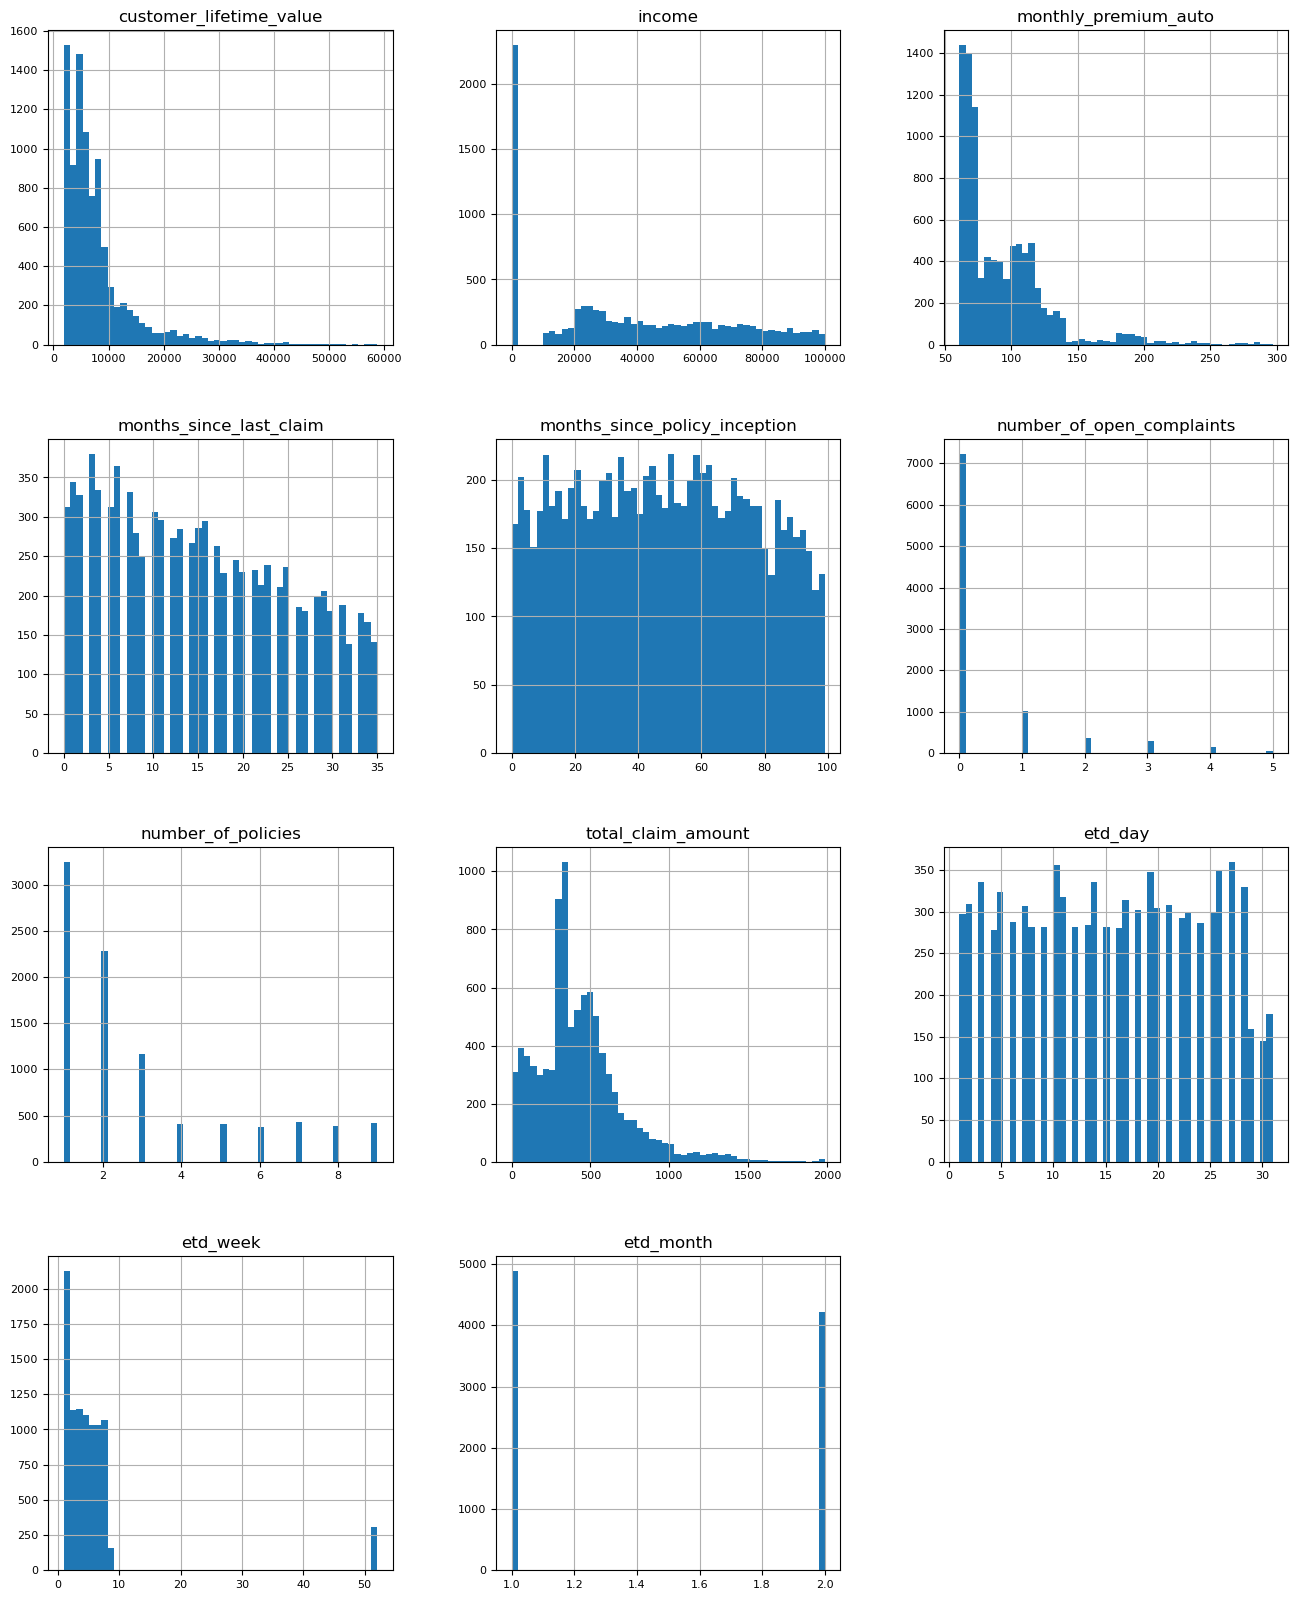

In [84]:
plot_discrete(numerical_df_lab_5)

Discrete Variables:
No discrete variable follows the typical normal distribution.

- monthly_premium_auto: right-skewed distribution or exponential distribution
- months_since_last_claim: lightly right-skewed distribution or exponential distribution
- months_since_policy_inception: uniform distribution
- number_of_open_complaints: strong right-skewed distribution or exponential distribution
- number_of_policies: right-skewed distribution or exponential distribution

Continuous Variables:
No continuous variable follows the typical normal distribution.

- customer_lifetime_value: strongly right-skewed distribution or exponential distribution
- income: a very high amount of 0 income - otherwise quite uniform.
- total_claim_amount: non-symmetric bimodal distribution or exponential distribution


### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

StandardScaler, MinMaxScaler and Logtransform.

#### StandardScaler

In [85]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numerical_df_lab_5)
numerical_df_lab_5_standardized = transformer.transform(numerical_df_lab_5)
numerical_df_lab_5_standardized = pd.DataFrame(numerical_df_lab_5_standardized, columns=numerical_df_lab_5.columns)

#### MinMaxScaler

In [87]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(numerical_df_lab_5)
numerical_df_lab_5_minmaxised = transformer.transform(numerical_df_lab_5)
numerical_df_lab_5_minmaxised = pd.DataFrame(numerical_df_lab_5_minmaxised, columns=numerical_df_lab_5.columns)

#### Log-transformation

In [90]:
def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [91]:
numerical_df_lab_5_log = pd.DataFrame()

for column in numerical_df_lab_5:
    numerical_df_lab_5_log[column] = list(map(log_transfom_clean, numerical_df_lab_5[column]))

numerical_df_lab_5_log

/var/folders/v7/ctgngqdj6_j2cgx35nnddp8r0000gn/T/ipykernel_6881/312512766.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
/var/folders/v7/ctgngqdj6_j2cgx35nnddp8r0000gn/T/ipykernel_6881/312512766.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
/var/folders/v7/ctgngqdj6_j2cgx35nnddp8r0000gn/T/ipykernel_6881/312512766.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
/var/folders/v7/ctgngqdj6_j2cgx35nnddp8r0000gn/T/ipykernel_6881/312512766.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,etd_day,etd_week,etd_month
0,3.441462,4.750308,1.838849,1.505150,0.698970,0.000000,0.000000,2.585248,1.380211,0.903090,0.30103
1,3.843827,0.000000,1.973128,1.113943,1.623249,0.000000,0.903090,3.053641,1.491362,0.698970,0.00000
2,4.110166,4.688126,2.033424,1.255273,1.579784,0.000000,0.301030,2.753179,1.278754,0.845098,0.30103
3,3.883426,0.000000,2.025306,1.255273,1.812913,0.000000,0.845098,2.724179,1.301030,0.477121,0.00000
4,3.449277,4.641831,1.863323,1.079181,1.643453,0.000000,0.000000,2.140291,0.477121,0.698970,0.30103
...,...,...,...,...,...,...,...,...,...,...,...
9102,4.369327,4.856976,1.863323,1.255273,1.949390,0.000000,0.301030,2.297180,1.000000,0.778151,0.30103
9103,3.490873,4.334534,1.897627,1.146128,1.447158,0.000000,0.000000,2.578868,1.079181,0.778151,0.30103
9104,3.911897,0.000000,1.929419,0.954243,1.568202,0.477121,0.301030,2.898058,0.778151,0.698970,0.30103
9105,3.876474,4.341256,1.982271,1.531479,0.477121,0.000000,0.477121,2.839604,0.477121,0.698970,0.30103


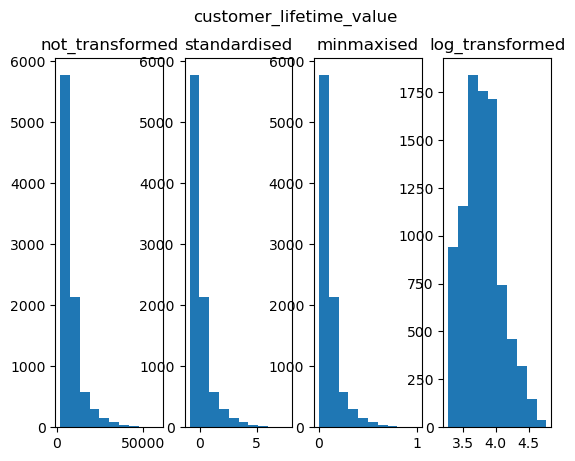

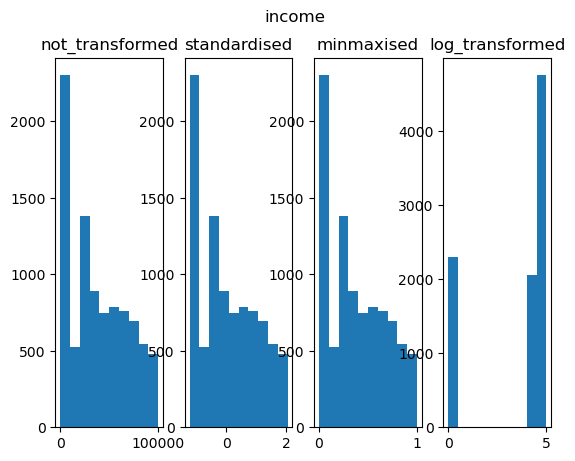

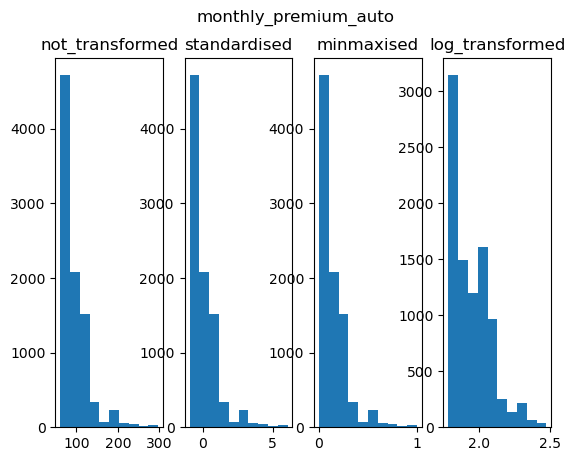

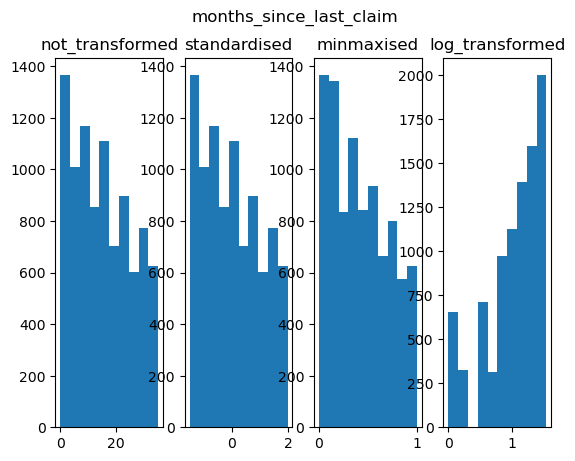

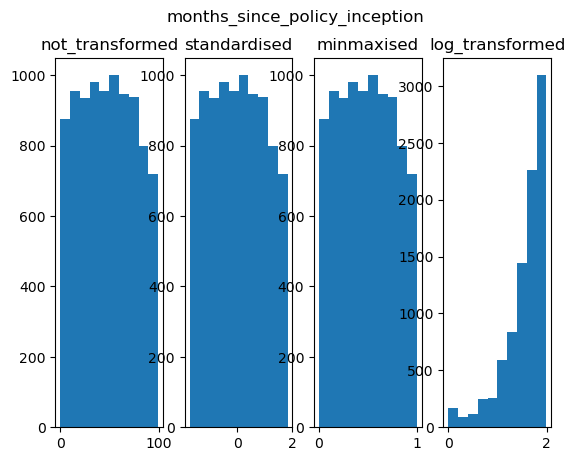

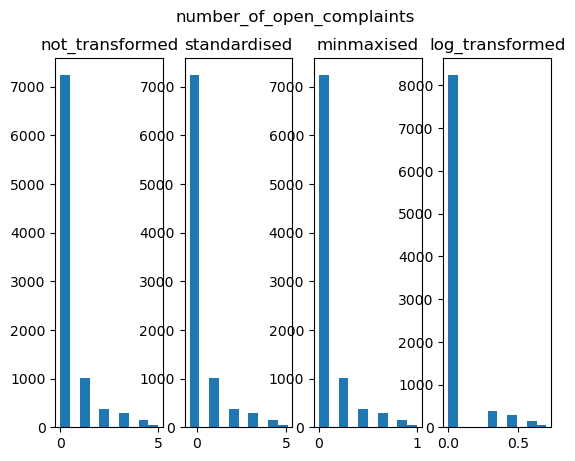

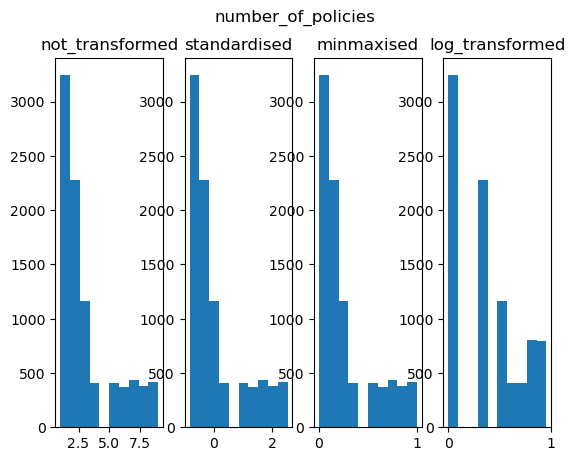

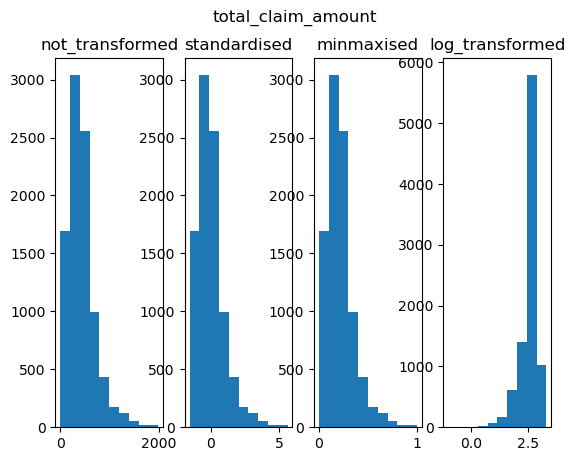

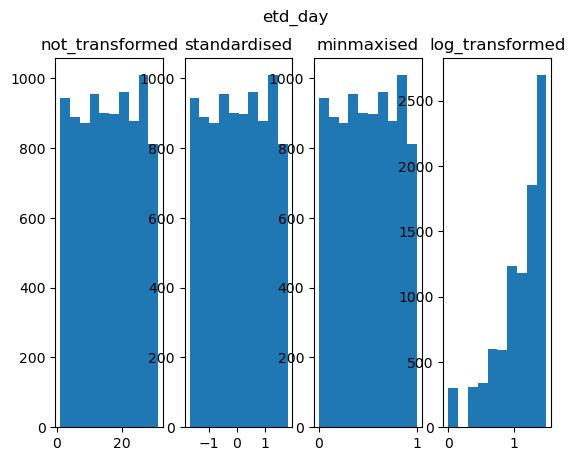

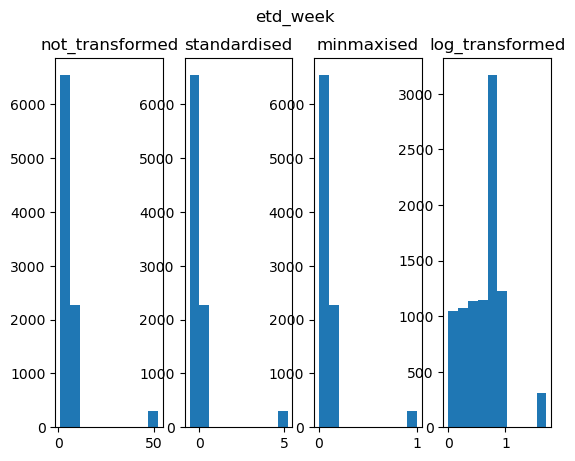

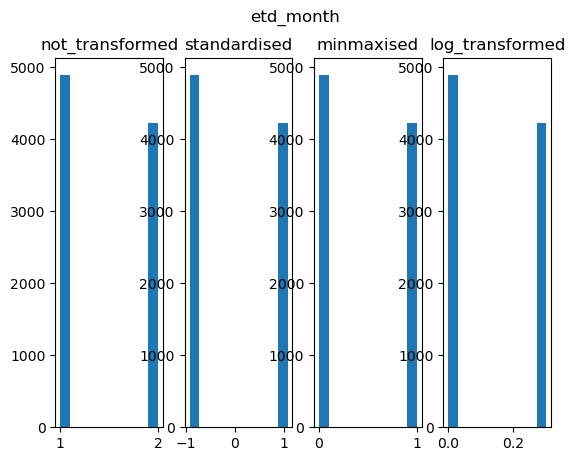

In [115]:
column_names = numerical_df_lab_5.columns.values.tolist()

for i in column_names:
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4)
    fig.suptitle(i)
    ax0.hist(numerical_df_lab_5[i])
    ax0.set_title('not_transformed')
    ax1.hist(numerical_df_lab_5_standardized[i])
    ax1.set_title('standardised')
    ax2.hist(numerical_df_lab_5_minmaxised[i])
    ax2.set_title('minmaxised')
    ax3.hist(numerical_df_lab_5_log[i])
    ax3.set_title('log_transformed')

As we can see the standardisation and minmaxisation do not really have an impact on the distribution. The Log-Transformation has especially on the:
- customer_lifetime_value: distribution gets more "normal"
- income: with the log-transformation a lot of "0" income were dropped, so we have actually an important loss of information.
- monthly_premium_auto: little difference
- months_since_last_claim: skewed to the left and not to the right anymore.
- months_since_policy_inception: strongly skewed to the left and not uniform anymore.
- number_of_open_complaints: litte difference
- number_of_policies: litte difference
- total_claim_amount: skewed to the left and not to the right anymore, maybe even "normal" ?
- etd_day: strongly skewed to the left and not uniform anymore.
- etd_week: litte difference
- etd_month: litte difference

In [117]:
numerical_df_lab_5
numerical_df_lab_5_log = np.log10(numerical_df_lab_5)
numerical_df_lab_5_log

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,etd_day,etd_week,etd_month
0,3.441462,4.750308,1.838849,1.505150,0.698970,-inf,0.000000,2.585248,1.380211,0.90309,0.30103
1,3.843827,-inf,1.973128,1.113943,1.623249,-inf,0.903090,3.053641,1.491362,0.69897,0.00000
2,4.110166,4.688126,2.033424,1.255273,1.579784,-inf,0.301030,2.753179,1.278754,0.845098,0.30103
3,3.883426,-inf,2.025306,1.255273,1.812913,-inf,0.845098,2.724179,1.301030,0.477121,0.00000
4,3.449277,4.641831,1.863323,1.079181,1.643453,-inf,0.000000,2.140291,0.477121,0.69897,0.30103
...,...,...,...,...,...,...,...,...,...,...,...
9129,4.369327,4.856976,1.863323,1.255273,1.949390,-inf,0.301030,2.297180,1.000000,0.778151,0.30103
9130,3.490873,4.334534,1.897627,1.146128,1.447158,-inf,0.000000,2.578868,1.079181,0.778151,0.30103
9131,3.911897,-inf,1.929419,0.954243,1.568202,0.477121,0.301030,2.898058,0.778151,0.69897,0.30103
9132,3.876474,4.341256,1.982271,1.531479,0.477121,-inf,0.477121,2.839604,0.477121,0.69897,0.30103


In [118]:
numerical_df_lab_5_log = numerical_df_lab_5_log.replace([np.inf, -np.inf], 0, inplace=True)
numerical_df_lab_5_log